In [ ]:
!pip install hmmlearn

     |████████████████████████████████| 378kB 3.8MB/s 


In [ ]:
pip install hmmlearn

In [ ]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import cv2
import seaborn as sn
import pandas as pd

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD


In [ ]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(-1, 28, 28)
X_test= X_test.reshape(-1, 28, 28)

In [ ]:
X_train_small=X_train_small.reshape(-1, 14)

In [ ]:
X_train_small.shape

(840000, 14)

In [ ]:
X_train_small = np.zeros((X_train.shape[0], 14, 14))
for i in range(X_train.shape[0]):
    X_train_small[i] = cv2.resize(X_train[i], (14, 14))

In [ ]:
X_test_small = np.zeros((X_test.shape[0], 14, 14))
for i in range(X_test.shape[0]):
    X_test_small[i] = cv2.resize(X_test[i], (14, 14))

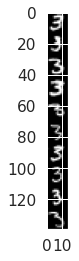

In [ ]:
plt.imshow(X_train_small[y_train == 3][:10].reshape(10 * 14, 14), cmap='gray')

In [ ]:
models = [hmm.GaussianHMM(n_components=5, covariance_type="spherical", n_iter=100, verbose=True) for i in range(10)]

In [ ]:

accuracytest, accuracytrain = list(), list()
	# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
	# enumerate splits
k=1
for train_ix, test_ix in kfold.split(X_train_small):

    print(k,'of 5-Fold:')
		# select rows for train and test
    models = [hmm.GaussianHMM(n_components=5, covariance_type="spherical", n_iter=100, verbose=True) for i in range(10)]
    trainX, trainY, testX, testY = X_train_small[train_ix], y_train[train_ix], X_train_small[test_ix], y_train[test_ix]
		# fit model
    for i in range(10):
      models[i] = models[i].fit(trainX[trainY == i].reshape(-1, 14), [14] * trainX[trainY == i].shape[0])
		# evaluate model Train
    conf_mat_train = np.zeros((10, 10))
    for n in range(trainX.shape[0]):
        probs = np.array([models[j].score(trainX[n]) for j in range(10)])
        pred = np.argmax(probs)
        conf_mat_train[pred, int(trainY[n])] += 1
    print('train Accuracy',k,":", sum(conf_mat_train.diagonal()) / conf_mat_train.sum())
    #evaluate Test
    conf_mat_test = np.zeros((10, 10))
    for m in range(testX.shape[0]):
        probs = np.array([models[j].score(testX[m]) for j in range(10)])
        pred = np.argmax(probs)
        conf_mat_test[pred, int(testY[m])] += 1
    print('test Accuracy:', sum(conf_mat_test.diagonal()) / conf_mat_test.sum())
		# stores scores
    accuracytrain.append(sum(conf_mat_train.diagonal()) / conf_mat_train.sum())
    accuracytest.append( sum(conf_mat_test.diagonal()) / conf_mat_test.sum())

1 of 5-Fold:


         1    -5245754.3068             +nan
         2    -4825231.6698     +420522.6369
         3    -4668995.2579     +156236.4120
         4    -4416645.6918     +252349.5661
         5    -4030592.8582     +386052.8336
         6    -3512683.5315     +517909.3266
         7    -2643836.1027     +868847.4289
         8    -2211052.8974     +432783.2053
         9    -2210859.5764        +193.3209
        10    -2210728.8717        +130.7048
        11    -2210629.4729         +99.3987
        12    -2210546.8737         +82.5992
        13    -2210473.6114         +73.2622
        14    -2210405.1929         +68.4185
        15    -2210338.3350         +66.8579
        16    -2210270.0947         +68.2403
        17    -2210197.3751         +72.7196
        18    -2210116.6517         +80.7233
        19    -2210023.9088         +92.7429
        20    -2209914.8115        +109.0973
        21    -2209785.1290        +129.6825
        22    -2209630.8943        +154.2347
        23

train Accuracy 1 : 0.5165
test Accuracy: 0.5209166666666667
1 of 5-Fold:


         1    -5184213.1101             +nan
         2    -4765321.3522     +418891.7579
         3    -4609512.7921     +155808.5601
         4    -4359057.9104     +250454.8817
         5    -3974171.4074     +384886.5030
         6    -3463844.3739     +510327.0336
         7    -2617933.6964     +845910.6775
         8    -2190866.9819     +427066.7144
         9    -2190682.6695        +184.3125
        10    -2190553.2120        +129.4574
        11    -2190452.6885        +100.5235
        12    -2190367.5281         +85.1604
        13    -2190291.0280         +76.5001
        14    -2190219.0442         +71.9837
        15    -2190148.4122         +70.6321
        16    -2190076.1969         +72.2153
        17    -2189999.3034         +76.8934
        18    -2189914.3131         +84.9903
        19    -2189817.4363         +96.8768
        20    -2189704.5898        +112.8465
        21    -2189571.5161        +133.0737
        22    -2189413.6797        +157.8364
        23

train Accuracy 1 : 0.5175416666666667
test Accuracy: 0.5085833333333334
1 of 5-Fold:


         1    -5228971.6342             +nan
         2    -4807763.9198     +421207.7144
         3    -4651111.1208     +156652.7991
         4    -4400234.6976     +250876.4232
         5    -4014071.8351     +386162.8624
         6    -3514657.9719     +499413.8632
         7    -2638297.6033     +876360.3687
         8    -2207168.0731     +431129.5301
         9    -2206991.8333        +176.2398
        10    -2206875.2128        +116.6206
        11    -2206787.1809         +88.0319
        12    -2206714.3938         +72.7871
        13    -2206650.7374         +63.6563
        14    -2206593.0406         +57.6969
        15    -2206539.2697         +53.7708
        16    -2206487.7456         +51.5241
        17    -2206436.8151         +50.9305
        18    -2206384.7072         +52.1079
        19    -2206329.4579         +55.2493
        20    -2206268.8821         +60.5758
        21    -2206200.5732         +68.3090
        22    -2206121.9012         +78.6720
        23

train Accuracy 1 : 0.51725
test Accuracy: 0.51875
1 of 5-Fold:


         1    -5227163.5586             +nan
         2    -4805725.1103     +421438.4483
         3    -4647000.2008     +158724.9095
         4    -4396243.9352     +250756.2656
         5    -4012587.8829     +383656.0523
         6    -3511631.9628     +500955.9201
         7    -2203205.9081    +1308426.0547
         8    -2202876.3905        +329.5175
         9    -2202679.8103        +196.5802
        10    -2202547.2823        +132.5280
        11    -2202446.1559        +101.1264
        12    -2202361.6855         +84.4704
        13    -2202286.4847         +75.2008
        14    -2202216.3350         +70.1497
        15    -2202148.4160         +67.9190
        16    -2202080.4676         +67.9484
        17    -2202010.3701         +70.0975
        18    -2201935.9177         +74.4523
        19    -2201854.6751         +81.2426
        20    -2201763.9615         +90.7136
        21    -2201661.0898        +102.8717
        22    -2201543.5607        +117.5291
        23

train Accuracy 1 : 0.52225
test Accuracy: 0.51775
1 of 5-Fold:


         1    -5198078.5979             +nan
         2    -4777106.3610     +420972.2368
         3    -4614585.1272     +162521.2339
         4    -4350676.4261     +263908.7011
         5    -3970068.8719     +380607.5541
         6    -3456037.5897     +514031.2822
         7    -2613968.1531     +842069.4366
         8    -2184240.0480     +429728.1051
         9    -2184082.9856        +157.0624
        10    -2183985.3633         +97.6224
        11    -2183917.5027         +67.8606
        12    -2183865.9250         +51.5777
        13    -2183824.1081         +41.8169
        14    -2183788.5432         +35.5649
        15    -2183757.1306         +31.4126
        16    -2183728.4753         +28.6553
        17    -2183701.5553         +26.9200
        18    -2183675.5545         +26.0008
        19    -2183649.7692         +25.7853
        20    -2183623.5454         +26.2238
        21    -2183596.2285         +27.3169
        22    -2183567.1161         +29.1124
        23

train Accuracy 1 : 0.5157916666666666
test Accuracy: 0.5201666666666667


In [ ]:
for i in range(5):
  print('train accuracy for Fold',i+1,': ',accuracytrain[i])

train accuracy for Fold 1 :  0.5165
train accuracy for Fold 2 :  0.5175416666666667
train accuracy for Fold 3 :  0.51725
train accuracy for Fold 4 :  0.52225
train accuracy for Fold 5 :  0.5157916666666666


In [ ]:
for i in range(5):
  print('validation accuracy for Fold',i+1,': ',accuracytest[i])

validation accuracy for Fold 1 :  0.5209166666666667
validation accuracy for Fold 2 :  0.5085833333333334
validation accuracy for Fold 3 :  0.51875
validation accuracy for Fold 4 :  0.51775
validation accuracy for Fold 5 :  0.5201666666666667


In [ ]:
conf_mat_train = np.zeros((10, 10))
for i in range(X_train_small.shape[0]):
    probs = np.array([models[j].score(X_train_small[i]) for j in range(10)])
    pred = np.argmax(probs)
    conf_mat_train[pred, int(y_train[i])] += 1

In [ ]:
print('Train Accuracy:', sum(conf_mat_train.diagonal()) / conf_mat_train.sum())

Train Accuracy: 0.5180166666666667


Text(25.5, 0.5, 'Predicted')

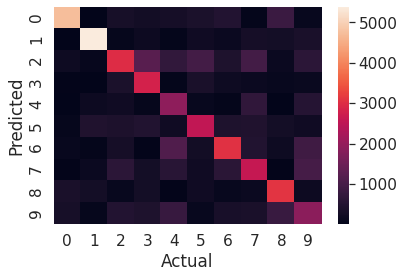

In [ ]:
df_cm = pd.DataFrame(conf_mat_train, range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=False, annot_kws={"size": 16}) # font size

plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
conf_mat_test = np.zeros((10, 10))
for i in range(X_test_small.shape[0]):
    probs = np.array([models[j].score(X_test_small[i]) for j in range(10)])
    pred = np.argmax(probs)
    conf_mat_test[pred, int(y_test[i])] += 1

In [ ]:
print('test Accuracy:', sum(conf_mat_test.diagonal()) / conf_mat_test.sum())

test Accuracy: 0.5247


Text(25.5, 0.5, 'Predicted')

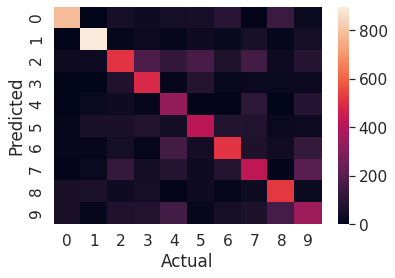

In [ ]:
df_cm = pd.DataFrame(conf_mat_test, range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=False, annot_kws={"size": 16}) # font size

plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
X_train_CNN = trainX.reshape((trainX.shape[0], 28, 28, 1))
X_test_CNN = testX.reshape((testX.shape[0], 28, 28, 1))
# one hot encode 
y_train_CNN = to_categorical(trainY)
y_test_CNN = to_categorical(testY)
